#### **Perform the following data analysis on the "Hepatitis" dataset from the UCI repository (https://archive.ics.uci.edu/ml/datasets/hepatitis). Each and every analysis should be supported with proper visualization.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


In [ ]:
df=pd.read_csv('hepatitis.csv', names=['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver_big','Liver_firm','Spleen_palpable','Spiders','Ascites','Varices','Bilirubin','Alk_phosphate','Sgot','Albumin','Protime','Histology'])
df.replace("?", np.nan , inplace=True)
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
for col in df.columns:
  c = str(col)
  print(c)
  df[col] = pd.to_numeric(df[col])

df.info()

Class
Age
Sex
Steroid
Antivirals
Fatigue
Malaise
Anorexia
Liver_big
Liver_firm
Spleen_palpable
Spiders
Ascites
Varices
Bilirubin
Alk_phosphate
Sgot
Albumin
Protime
Histology
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          154 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          154 non-null    float64
 6   Malaise          154 non-null    float64
 7   Anorexia         154 non-null    float64
 8   Liver_big        145 non-null    float64
 9   Liver_firm       144 non-null    float64
 10  Spleen_palpable  150 non-null    float64
 11  Spiders          150 non-null    float64
 12  Ascites          150 non-null    float64
 13  Varices          150 non-n

In [ ]:
df['Class']=df['Class'].map({1: 'Die', 2:'Live'})
df['Sex']=df['Sex'].map({1: 'Male', 2:'Female'})
df['Steroid']=df['Steroid'].map({1:'No',2:'Yes'})
df['Antivirals']=df['Antivirals'].map({1:'No',2:'Yes'})
df['Fatigue']=df['Fatigue'].map({1:'No',2:'Yes'})
df['Malaise']=df['Malaise'].map({1:'No',2:'Yes'})
df['Anorexia']=df['Anorexia'].map({1:'No',2:'Yes'})
df['Liver_big']=df['Liver_big'].map({1:'No',2:'Yes'})
df['Liver_firm']=df['Liver_firm'].map({1:'No',2:'Yes'})
df['Spleen_palpable']=df['Spleen_palpable'].map({1:'No',2:'Yes'})
df['Spiders']=df['Spiders'].map({1:'No',2:'Yes'})
df['Ascites']=df['Ascites'].map({1:'No',2:'Yes'})
df['Varices']=df['Varices'].map({1:'No',2:'Yes'})
df['Histology']=df['Histology'].map({1:'No',2:'Yes'})

In [ ]:
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,Live,30,Female,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,1.0,85.0,18.0,4.0,NaN,No
1,Live,50,Male,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,0.9,135.0,42.0,3.5,NaN,No
2,Live,78,Male,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.7,96.0,32.0,4.0,NaN,No
3,Live,31,Male,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.7,46.0,52.0,4.0,80.0,No
4,Live,34,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,NaN,200.0,4.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Die,46,Male,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No,7.6,NaN,242.0,3.3,50.0,Yes
151,Live,44,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,0.9,126.0,142.0,4.3,NaN,Yes
152,Live,61,Male,No,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,0.8,75.0,20.0,4.1,NaN,Yes
153,Live,53,Female,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,1.5,81.0,19.0,4.1,48.0,Yes



**i. Identify and count the missing values in a dataframe. Clean the data after removing noise as follows:**

        1. Drop columns having more than n% of missing values
                (n should be computed as ((LastTwoDigitsOfRollNumber%3  + 1) * 5))
                For Example: LastTwoDigitsOfRollNumber = 69 % 3 = 0
                n = (0+1) * 5 = 5%
        2. Drop duplicate rows.
        3. Detect the outliers and remove the rows having outliers.


Exam roll no.:19021570030
Last two digits: 30
n= [(30%3)+1]*5
n=5

In [ ]:
### CODE HERE ###
#1.
n = (30%3 + 1)*5     #Roll no.:19021570030
A = df.isnull().mean() * 100
drop_cols = A[A > n].index
df.drop(drop_cols, axis=1, inplace=True)
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Sgot,Histology
0,Live,30,Female,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,18.0,No
1,Live,50,Male,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,0.9,42.0,No
2,Live,78,Male,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,0.7,32.0,No
3,Live,31,Male,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.7,52.0,No
4,Live,34,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,200.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Die,46,Male,Yes,Yes,No,No,No,Yes,No,No,No,7.6,242.0,Yes
151,Live,44,Male,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,0.9,142.0,Yes
152,Live,61,Male,No,Yes,No,No,Yes,Yes,No,Yes,Yes,0.8,20.0,Yes
153,Live,53,Female,No,Yes,No,Yes,Yes,No,No,Yes,No,1.5,19.0,Yes


In [ ]:
#2.
df.drop_duplicates(inplace=True)
df.shape

(155, 15)

In [ ]:
#3.
R=df.quantile(0.25)
S=df.quantile(0.75)
IQR=R-S
lower_bound=R - 1.5 * IQR
upper_bound=S + 1.5 * IQR
print(lower_bound,upper_bound)
IQR_price = df[~((df < lower_bound) |(df > upper_bound)).any(axis=1)]
print("Shape:")
IQR_price.shape

Age           59.0
Bilirubin      1.9
Sgot         135.0
dtype: float64 Age          23.0
Bilirubin     0.3
Sgot         -3.0
dtype: float64
Shape:


(0, 15)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



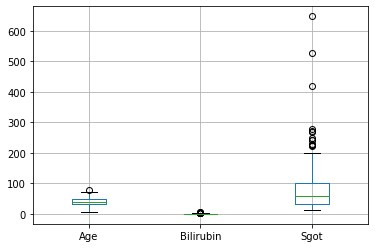

In [ ]:
df.boxplot()


**ii. Determine the most positively correlated attributes if your roll number ends with the odd number and the most negatively correlated attributes if your roll number ends with the even number. (Hint: Do not consider same attributes)**

                Age  Bilirubin      Sgot
Age        1.000000   0.125463  0.082545
Bilirubin  0.125463   1.000000  0.232967
Sgot       0.082545   0.232967  1.000000


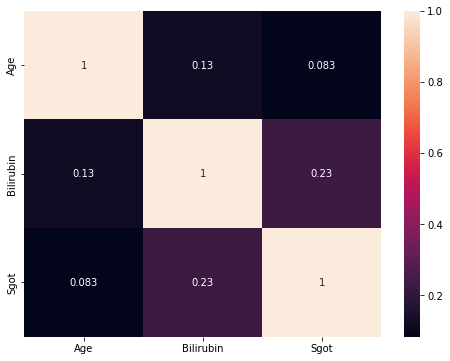

In [ ]:
print(df.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True)

#No negative correlation within the attributes



**iii.  Consider any two continuous columns.  Discretize the selected columns by mapping them to two bins and compare the frequency distribution of correponding bins by plotting histograms.**

Sgot
(13.366, 331.0]    148
(331.0, 648.0]       3
dtype: int64

Bilirubin
(0.292, 4.15]    141
(4.15, 8.0]        8
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



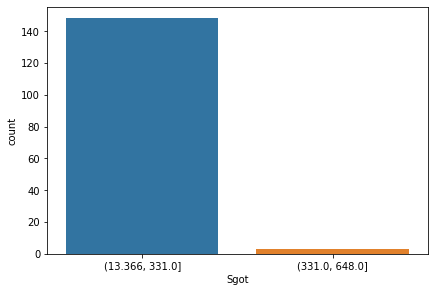

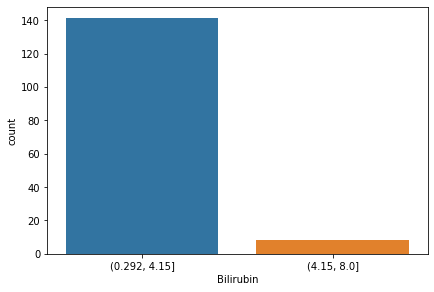

In [ ]:
### CODE HERE ###
Sgot_bins = pd.cut(df['Sgot'], bins=2)
Sgot_freq = df.groupby(Sgot_bins).size()
print(Sgot_freq)
print("")
Bilirubin_bins = pd.cut(df['Bilirubin'], bins=2)
Bilirubin_freq = df.groupby(Bilirubin_bins).size()
print(Bilirubin_freq)
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(Sgot_bins)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
sns.countplot(Bilirubin_bins)
plt.show()


**iv. Calculate and display age-wise, count of people who are dead or alive.**

In [ ]:
### CODE HERE ###
died=df[df.Class=='Die']
print("Age wise count of people who are dead\n" ,died.groupby(["Age"]).size())
print("\nTotal Dead people=",died.Age.count())

live=df[df.Class=='Live']
print("\n\n\nAge wise count of people who are alive\n" ,live.groupby(["Age"]).size())
print("\nTotal Alive people=",live.Age.count())

fig = px.histogram(df, x='Age', color="Class", barmode='group',title='Count of people who are dead or alive(Age-wise)')
fig.show()

Age wise count of people who are dead
 Age
30    1
31    1
33    1
34    1
35    1
37    1
38    2
39    1
41    1
42    2
43    1
44    1
45    1
46    1
47    3
48    1
49    1
50    1
51    1
54    1
56    1
57    2
58    1
59    1
61    1
62    1
70    1
dtype: int64

Total Dead people= 32



Age wise count of people who are alive
 Age
7     1
20    3
22    2
23    4
24    2
25    3
26    1
27    4
28    5
30    7
31    3
32    4
33    2
34    7
35    1
36    7
37    4
38    6
39    5
40    3
41    2
42    3
44    4
45    4
47    1
48    1
49    2
50    5
51    5
52    3
53    1
54    4
56    2
58    1
60    1
61    2
62    1
64    1
65    1
66    1
67    1
69    1
72    1
78    1
dtype: int64

Total Alive people= 123
